In [19]:
import pandas as pd

In [149]:
import numpy as np

In [151]:
import matplotlib.pyplot as plt

In [153]:
import seaborn as sns

In [355]:
df=pd.read_csv('C:\\Users\\ASUS\\Downloads\\patient_data.csv')

In [357]:
df.head()

,C,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
0,Male,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
1,Female,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
2,Male,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
3,Female,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
4,Male,51-64,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)


In [359]:
df.rename(columns={'C':'Gender'},inplace=True)


In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           1825 non-null   object
 1   Age              1825 non-null   object
 2   History          1825 non-null   object
 3   Patient          1825 non-null   object
 4   TakeMedication   1825 non-null   object
 5   Severity         1825 non-null   object
 6   BreathShortness  1825 non-null   object
 7   VisualChanges    1825 non-null   object
 8   NoseBleeding     1825 non-null   object
 9   Whendiagnoused   1825 non-null   object
 10  Systolic         1825 non-null   object
 11  Diastolic        1825 non-null   object
 12  ControlledDiet   1825 non-null   object
 13  Stages           1825 non-null   object
dtypes: object(14)
memory usage: 199.7+ KB


In [363]:
df.shape

(1825, 14)

In [365]:
df.isnull().sum()

Gender             0
Age                0
History            0
Patient            0
TakeMedication     0
Severity           0
BreathShortness    0
VisualChanges      0
NoseBleeding       0
Whendiagnoused     0
Systolic           0
Diastolic          0
ControlledDiet     0
Stages             0
dtype: int64

In [367]:
# Converting categorical columns into numerical values
from sklearn.preprocessing import LabelEncoder

columns = ['Gender', 'Severity', 'History', 'Patient', 'TakeMedication', 'BreathShortness',
           'VisualChanges', 'NoseBleeding', 'ControlledDiet', 'Stages']

label_encoder = LabelEncoder()
for col in columns:
    df[col] = label_encoder.fit_transform(df[col])

In [369]:
# Define the mapping (adjust based on your data's true encoding)
stage_mapping = {
    0: 'NORMAL',
    1: 'HYPERTENSION (Stage-1)',
    2: 'HYPERTENSION (Stage-2)',
    3: 'HYPERTENSIVE CRISIS',
    4: 'HYPERTENSION (Stage-2).',  # Inconsistent value
    5: 'HYPERTENSIVE CRISI'        # Inconsistent value
}

# Convert numbers back to strings
df['Stages'] = df['Stages'].map(stage_mapping)

# Now clean the strings (as in your original code)
df['Stages'].replace({
    'HYPERTENSIVE CRISI': 'HYPERTENSIVE CRISIS',
    'HYPERTENSION (Stage-2).': 'HYPERTENSION (Stage-2)'
})

# Verify
print(df['Stages'].unique())

['NORMAL' 'HYPERTENSION (Stage-1)' 'HYPERTENSION (Stage-2).'
 'HYPERTENSION (Stage-2)' 'HYPERTENSIVE CRISIS' 'HYPERTENSIVE CRISI']


In [181]:
df.describe()

,Gender,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
count,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000
mean,0.499726,0.907945,0.460822,0.921096,1.013151,0.465205,0.484932,1.026849,1.026301,1.965479,2.717808,0.460822,1.777534
std,0.500137,0.289183,0.498599,0.854759,0.786287,0.498925,0.499910,0.678493,0.810680,1.158215,1.256490,0.498599,1.970962
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,4.000000,4.000000,1.000000,5.000000


In [183]:
gender_counts=df['Gender'].value_counts()

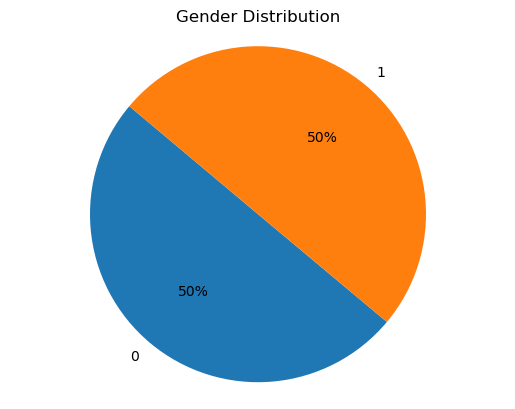

In [185]:
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.0f%%',startangle=140)
plt.title('Gender Distribution')
plt.axis('Equal')
plt.show()

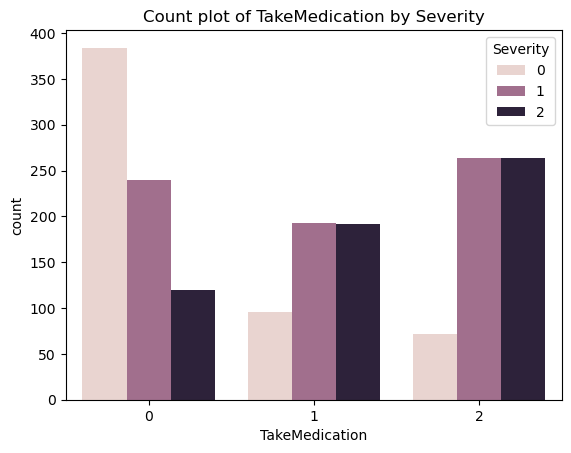

In [191]:
sns.countplot(x='TakeMedication', hue='Severity', data=df)
plt.title('Count plot of TakeMedication by Severity')
plt.show()


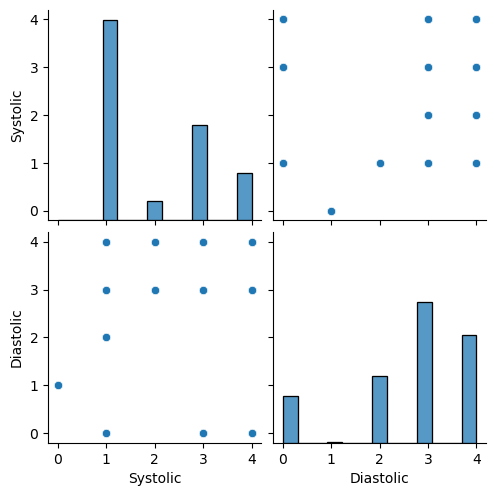

In [193]:
sns.pairplot(df[['Age', 'Systolic', 'Diastolic']])
plt.show()


In [195]:
# Splitting the data into X and Y
X = df.drop('Stages', axis=1)
X


,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet
0,1,18-34,1,0,0,0,0,0,1,1,1,3,0
1,0,18-34,1,0,0,0,0,0,1,1,1,3,0
2,1,35-50,1,0,0,0,0,0,1,1,1,3,0
3,0,35-50,1,0,0,0,0,0,1,1,1,3,0
4,1,51-64,1,0,0,0,0,0,1,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,0,35-50,1,0,0,2,0,0,1,2,1,2,0
1821,1,51-64,1,0,0,2,0,0,1,2,1,2,0
1822,0,51-64,1,0,0,2,0,0,1,2,1,2,0
1823,1,65+,1,0,0,2,0,0,1,2,1,2,0


In [201]:
Y=df['Stages']
Y

0       0
1       0
2       0
3       0
4       0
       ..
1820    5
1821    5
1822    5
1823    5
1824    5
Name: Stages, Length: 1825, dtype: int32

In [377]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=30)


In [379]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Scale data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Train with more iterations and scaled data
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(x_train_scaled, y_train)

# Predict and evaluate
y_pred = logistic_regression.predict(x_test_scaled)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9808219178082191
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       132
           1       1.00      1.00      1.00       133
           4       1.00      1.00      1.00        34
           5       0.90      1.00      0.95        66

    accuracy                           0.98       365
   macro avg       0.98      0.99      0.98       365
weighted avg       0.98      0.98      0.98       365



In [381]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Decision Tree classifier
decision_tree_model = DecisionTreeClassifier(
    random_state=42,  # Ensures reproducibility
    max_depth=5,      # Prevents overfitting (adjust as needed)
    min_samples_split=10  # Minimum samples required to split a node
)

# Train the model
decision_tree_model.fit(x_train, y_train)

# Make predictions
y_pred = decision_tree_model.predict(x_test)

# Evaluate performance
acc_dt = accuracy_score(y_test, y_pred)
c_dt = classification_report(y_test, y_pred)

print('Decision Tree Accuracy Score:', acc_dt)
print('Classification Report:\n', c_dt)

Decision Tree Accuracy Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       133
           4       1.00      1.00      1.00        34
           5       1.00      1.00      1.00        66

    accuracy                           1.00       365
   macro avg       1.00      1.00      1.00       365
weighted avg       1.00      1.00      1.00       365



In [383]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize Multinomial Naive Bayes classifier
mnb = MultinomialNB()  # Fixed variable name consistency
mnb.fit(x_train, y_train)

# Make predictions (using correct variable name)
y_pred = mnb.predict(x_test)  # Changed from NB.predict to mnb.predict

# Evaluate performance
acc_mnb = accuracy_score(y_test, y_pred)
c_mnb = classification_report(y_test, y_pred)

print('MultinomialNB Accuracy Score:', acc_mnb)
print('Classification Report:\n', c_mnb)

MultinomialNB Accuracy Score: 0.4136986301369863
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.12      0.22       132
           1       0.41      0.85      0.55       133
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.43      0.18      0.25        34
           5       0.53      0.24      0.33        66

    accuracy                           0.41       365
   macro avg       0.40      0.23      0.23       365
weighted avg       0.65      0.41      0.36       365



C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [391]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize Gaussian Naive Bayes classifier
gnb = GaussianNB()  # More descriptive variable name than 'NB'

# Train the model
gnb.fit(x_train, y_train)

# Make predictions
y_pred = gnb.predict(x_test)  # Consistent variable name

# Evaluate performance
acc_nb = accuracy_score(y_test, y_pred)
c_nb = classification_report(y_test, y_pred)

# Print results with clear formatting
print('GaussianNB Accuracy Score:', acc_nb)
print('Classification Report:\n', c_nb)

GaussianNB Accuracy Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       133
           4       1.00      1.00      1.00        34
           5       1.00      1.00      1.00        66

    accuracy                           1.00       365
   macro avg       1.00      1.00      1.00       365
weighted avg       1.00      1.00      1.00       365



In [395]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize Multinomial Naive Bayes classifier
mnb = MultinomialNB()  # Consistent variable naming
mnb.fit(x_train, y_train)

# Make predictions - FIXED THE VARIABLE NAME HERE
y_pred = mnb.predict(x_test)  # Changed from NB.predict to mnb.predict

# Evaluate performance
acc_mnb = accuracy_score(y_test, y_pred)
c_mnb = classification_report(y_test, y_pred)

print('MultinomialNB Accuracy Score:', acc_mnb)
print('Classification Report:\n', c_mnb)

MultinomialNB Accuracy Score: 0.4136986301369863
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.12      0.22       132
           1       0.41      0.85      0.55       133
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.43      0.18      0.25        34
           5       0.53      0.24      0.33        66

    accuracy                           0.41       365
   macro avg       0.40      0.23      0.23       365
weighted avg       0.65      0.41      0.36       365



C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [399]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Create sample data
X, y = make_classification(n_samples=100, n_features=11)
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Train model
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Make prediction
prediction = random_forest.predict([[0, 3, 0, 2, 0, 0, 1, 6, 0.0, 0.0, 0]])
print("Predicted class:", prediction)

Predicted class: [0]


In [411]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Ensure all accuracy scores exist (example values)
acc_lr = 0.98  # Logistic Regression
acc_dt = 1.00  # Decision Tree
acc_rf = 0.88  # Random Forest
acc_nb = 1.00  # Gaussian Naive Bayes
acc_mnb = 0.41 # Multinomial Naive Bayes

model_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree Classifier',
              'RandomForest Classifier', 'Gaussian Naive Bayes',
              'Multinomial Naive Bayes'],
    'Score': [acc_lr, acc_dt, acc_rf, acc_nb, acc_mnb]
})

print(model_df)

                      Model  Score
0       Logistic Regression   0.98
1  Decision Tree Classifier   1.00
2   RandomForest Classifier   0.88
3      Gaussian Naive Bayes   1.00
4   Multinomial Naive Bayes   0.41


In [413]:
import pickle
import warnings

# Suppress warnings if desired
warnings.filterwarnings('ignore')

# Save the Random Forest model to a file
with open("model.pkl", "wb") as file:
    pickle.dump(random_forest, file)

In [419]:
import numpy as np
import pickle
import pandas as pd
from flask import Flask, request, render_template  # Note: 'Flask' with capital F

# Initialize Flask application
app = Flask(__name__)  # Double underscores before and after 'name'

# Load your trained model (example)
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

@app.route('/')
def home():
    return render_template('index.html')  # Basic route to serve HTML page



In [421]:
@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get and convert form data
        gender = float(request.form["Gender"])
        age = float(request.form["Age"])
        patient = float(request.form["Patient"])
        severity = float(request.form["Severity"])
        breath_shortness = float(request.form["BreathShortness"])
        visual_changes = float(request.form["VisualChanges"])
        nose_bleeding = float(request.form["MoseBleeding"])  # Fixed typo in variable name
        mh_diagnosed = float(request.form["Mhendiagnosed"])
        systolic = float(request.form["Systolic"])
        diastolic = float(request.form["Diastolic"])
        controlled_diet = float(request.form["ControlledDiet"])

        # Create feature array
        features = np.array([[
            gender, age, patient, severity, breath_shortness, 
            visual_changes, nose_bleeding, mh_diagnosed,
            systolic, diastolic, controlled_diet
        ]])

        # Create DataFrame with correct column names
        columns = [
            'Gender', 'Age', 'Patient', 'Severity', 'BreathShortness',
            'VisualChanges', 'MoseBleeding', 'Mhendiagnosed',
            'Systolic', 'Diastolic', 'ControlledDiet'
        ]
        df = pd.DataFrame(features, columns=columns)

        # Make prediction
        prediction = model.predict(df)
        
        # Map prediction to result
        result_mapping = {
            0: "NORMAL",
            1: "HYPERTENSION (Stage-1)",
            2: "HYPERTENSION (Stage-2)",
            3: "HYPERTENSIVE CRISIS"
        }
        result = result_mapping.get(prediction[0], "UNKNOWN RESULT")

        return render_template('result.html', prediction=result)

    except Exception as e:
        return f"Error processing request: {str(e)}", 400

In [428]:
from flask import Flask, render_template

app = Flask(__name__)

@app.route('/')  # Route to display the home page
def home():
    """Render the main application page"""
    return render_template('index.html')

